### 1. 資料前處理

* 載入原始資料集

In [1]:
import pandas as pd

df = pd.read_csv("yelp.csv")
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


* 只保留stars和text兩個會用在情緒分析的欄位

In [2]:
#only preservve the stars and text columns
df = df[['stars', 'text']]
df.head()

,stars,text
0,5,My wife took me here on my birthday for breakf...
1,5,I have no idea why some people give bad review...
2,4,love the gyro plate. Rice is so good and I als...
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!..."
4,5,General Manager Scott Petello is a good egg!!!...


* 將stars欄位當中的值，以大於等於4作為標準進行binary數值的轉換

In [3]:
#switch the stars to binary (1 for positive, 0 for negative sentiment)
df['stars'] = df['stars'].apply(lambda x: 1 if x >= 4 else 0)
df.head()

,stars,text
0,1,My wife took me here on my birthday for breakf...
1,1,I have no idea why some people give bad review...
2,1,love the gyro plate. Rice is so good and I als...
3,1,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!..."
4,1,General Manager Scott Petello is a good egg!!!...


* 將text欄位內的文字內容轉換成串列

In [4]:
#use separator to split the text into words
df['text'] = df['text'].str.split()
df.head()

,stars,text
0,1,"[My, wife, took, me, here, on, my, birthday, f..."
1,1,"[I, have, no, idea, why, some, people, give, b..."
2,1,"[love, the, gyro, plate., Rice, is, so, good, ..."
3,1,"[Rosie,, Dakota,, and, I, LOVE, Chaparral, Dog..."
4,1,"[General, Manager, Scott, Petello, is, a, good..."


* 載入nltk套件並且下載stopwords的資料

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\a0905\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

* 將text欄位中的停頓詞(stopwords)去除

In [6]:
#remove stop words in the text
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda x: [word for word in x if word not in stop_words])
df.head()

,stars,text
0,1,"[My, wife, took, birthday, breakfast, excellen..."
1,1,"[I, idea, people, give, bad, reviews, place., ..."
2,1,"[love, gyro, plate., Rice, good, I, also, dig,..."
3,1,"[Rosie,, Dakota,, I, LOVE, Chaparral, Dog, Par..."
4,1,"[General, Manager, Scott, Petello, good, egg!!..."


* 將text欄位當中的串列值轉換回字串

In [7]:
# Ensure all rows in 'text' are strings
df['text'] = df['text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
df.head()

,stars,text
0,1,My wife took birthday breakfast excellent. The...
1,1,I idea people give bad reviews place. It goes ...
2,1,love gyro plate. Rice good I also dig candy se...
3,1,"Rosie, Dakota, I LOVE Chaparral Dog Park!!! It..."
4,1,General Manager Scott Petello good egg!!! Not ...


* 用tf-idf的技術將text欄位當中的字串轉換成向量(vector)

In [8]:
#Text mining preprocessing, converting text into vectors, implement tf-idf (sklearn.feature_extraction.text.TfidfVectorizer)

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

#Apply tf-idf to the "Text" column
tfidf_matrix = tfidf.fit_transform(df['text']).toarray()  # Convert sparse to dense
tfidf_matrix


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

* 將資料進行分割，以80%/20%的比例分成訓練集和測試集，並且再把80%的訓練集再分成75%的訓練集和25%的驗證集

In [9]:
#split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, df['stars'], test_size=0.2, random_state=42)
#split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

### 2. CNN模型

卷積神經網路（CNN, Convolutional Neural Network）是一種常用於圖像處理和其他類型的數據分析的深度學習模型
* 1.卷積層（Convolutional Layer）
    * 這是CNN的核心，負責提取圖像中的特徵。卷積層使用卷積運算將filter（又稱為kernel）應用於輸入圖像，生成特徵圖（Feature Map）
    * 卷積運算可以幫助模型識別圖像中的邊緣、形狀和其他基本特徵
* 2.激活函數（Activation Function）
    * 通常在卷積層後面會使用激活函數（如ReLU）來引入非線性，使得網絡能夠學習更複雜的特徵
    * 激活函數的作用是將卷積層的輸出轉換為更有用的數值範圍
* 3.池化層（Pooling Layer）
    * 池化層常用來縮小特徵圖的尺寸（降維），常見的池化方式有最大池化（Max Pooling）和平均池化（Average Pooling）
    * 池化層有助於減少計算量，降低overfitting的風險，並且使得特徵具有平移不變性
* 4.全連接層（Fully Connected Layer）
    * 在CNN的最後，通常會有一層或多層全連接層，用來將提取到的特徵映射到最終的輸出類別（如圖片分類結果）
    * 全連接層中的每一個神經元都與前一層的所有神經元相連
* 5.輸出層（Output Layer）
    * 輸出層的神經元數量等於分類的類別數。對於二分類問題，通常會使用sigmoid激活函數；對於多分類問題，則會使用softmax激活函數
* 6.優化器（Optimizer）和損失函數（Loss Function）
    * 優化器（如Adam、SGD）用來更新網路中的權重，目的是最小化損失函數
    * 損失函數衡量預測值與實際值之間的誤差，通過反向傳播來調整網絡權重，達到更好的預測效果

CNN的特點:
* 特徵自動提取：CNN不需要手動提取特徵，它能夠自動學習和提取圖像中的關鍵特徵
* 局部連接：每個神經元只與上一層的一部分神經元相連，這有助於減少參數數量
* 權重共享：卷積層中的filter在整個圖像中共享權重，進一步減少了參數的數量

* 建立結構簡單的CNN模型用來訓練情緒分析的能力

In [10]:
#build the CNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.layers import Dropout

#add dropout layer to avoid overfitting
model = Sequential()
model.add(Embedding(input_dim=tfidf_matrix.shape[1], output_dim=128, input_length=tfidf_matrix.shape[1]))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=5))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

c:\Users\a0905\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


* 印出所建構出的CNN模型的架構

In [13]:
#show CNN model structure
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 29183, 128)     │     3,735,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 29181, 128)     │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 5836, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 5834, 64)       │        24,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 2917, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186688)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    11,948,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,272,517 (180.33 MB)

 Trainable params: 15,757,505 (60.11 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 31,515,012 (120.22 MB)

None


* 用建立完的CNN模型以切割出的訓練集和測試集進行訓練

In [12]:
#train the model
history = model.fit(X_train, y_train, epochs=3, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/3
188/188 ━━━━━━━━━━━━━━━━━━━━ 299s 2s/step - accuracy: 0.6676 - loss: 0.6978 - val_accuracy: 0.6805 - val_loss: 0.6339
Epoch 2/3
188/188 ━━━━━━━━━━━━━━━━━━━━ 296s 2s/step - accuracy: 0.6740 - loss: 0.6587 - val_accuracy: 0.6805 - val_loss: 0.6310
Epoch 3/3
188/188 ━━━━━━━━━━━━━━━━━━━━ 297s 2s/step - accuracy: 0.6758 - loss: 0.6460 - val_accuracy: 0.6805 - val_loss: 0.6287


* 繪製每個epoch的training accuracy和validation accuracy的變化圖

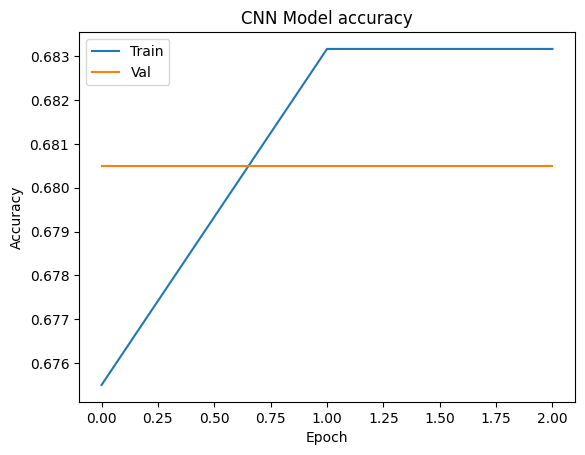

In [14]:
#plot the trainging process for the CNN model and show accuracy and loss
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='best')
plt.show()

* 繪製每個epoch的training loss和validation loss的變化圖

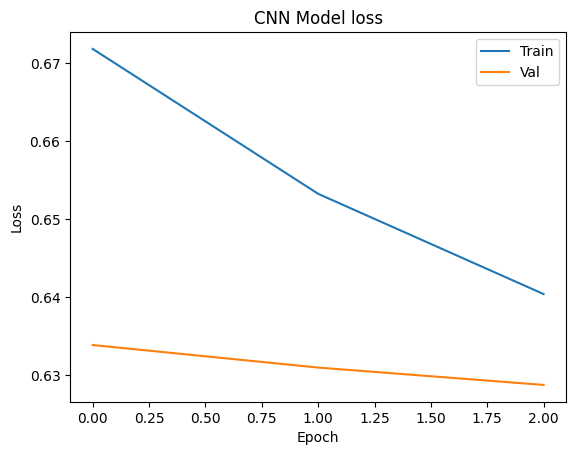

In [15]:
#plot the trainging process for the CNN model and show accuracy and loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='best')
plt.show()

* 用測試集的資料評估訓練出的CNN模型在情緒分析任務上的表現

In [16]:
#show accuracy on test data
scores = model.evaluate(X_test, y_test)
print("Accuracy: ", scores[1])

63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 145ms/step - accuracy: 0.6915 - loss: 0.6220
Accuracy:  0.7014999985694885


### 3. LSTM模型

長短期記憶網路（LSTM, Long Short-Term Memory）是一種特殊的循環神經網絡（RNN），用於處理和預測序列數據，特別擅長解決傳統RNN在長期依賴問題中的局限
* 1.LSTM的基本結構
    * LSTM包含一組特殊的記憶單元（memory cell），每個記憶單元都有三個主要的閘控結構：輸入閘（Input Gate）、遺忘閘（Forget Gate）和輸出閘（Output Gate）
    * 這些閘控決定了信息的傳遞方式，控制哪些資訊被記住、丟棄或傳遞給下一層
* 2.遺忘閘（Forget Gate）
    * 遺忘閘決定哪些資訊從單元的記憶中丟棄。它會根據當前輸入和前一狀態的輸出生成一個0到1之間的值，這個值用來乘以記憶單元的狀態，表示丟棄多少資訊
* 3.輸入閘（Input Gate）
    * 輸入閘控制哪些新資訊將被加入到單元的記憶中。它同樣生成一個0到1之間的值，並將其與當前的輸入進行加權後，更新記憶單元的狀態
* 4.輸出閘（Output Gate）
    * 輸出閘決定了記憶單元的哪些部分將被用來產生當前的輸出。它會根據當前的輸入和內部狀態生成一個0到1之間的值，這個值用來調節記憶單元狀態的輸出
* 5.記憶單元狀態更新
    * 記憶單元的狀態是LSTM的關鍵，它會結合遺忘閘的操作（丟棄部分舊資訊）和輸入閘的操作（加入新的資訊）進行更新，從而使得LSTM能夠記住關鍵的長期資訊
* 6.避免梯度消失(Gradient Vanishing)與梯度爆炸(Gradient Exploding)問題
    * 傳統的RNN在處理長序列時會遇到梯度消失或梯度爆炸的問題，而LSTM通過引入記憶單元和閘控結構，有效地解決了這些問題，使得LSTM可以學習長期依賴的關係

LSTM的特點：
* 1.長期依賴
    * LSTM能夠記住長期依賴關係，特別適合處理長序列數據，如語音識別、語言建模等
* 2.閘控結構
    * LSTM的閘控結構使得它可以動態地選擇性地儲存或遺忘資訊，從而更靈活地捕捉數據中的時間依賴性
* 3.避免RNN的缺陷
    * 相比傳統RNN，LSTM能夠更好地處理長期依賴問題，避免了梯度消失或爆炸的問題

* 建立結構簡單的LSTM模型用來訓練情緒分析的能力

In [17]:
#build the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.layers import SpatialDropout1D

model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=tfidf_matrix.shape[1], output_dim=128, input_length=tfidf_matrix.shape[1]))
model_lstm.add(SpatialDropout1D(0.7))
model_lstm.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

c:\Users\a0905\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


* 印出所建構出的LSTM模型的架構

In [25]:
#show LSTM model structure
print(model_lstm.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 29183, 128)     │     3,735,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ (None, 29183, 128)     │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,354,693 (43.31 MB)

 Trainable params: 3,784,897 (14.44 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,569,796 (28.88 MB)

None


* 用建立完的LSTM模型以切割出的訓練集和測試集進行訓練

In [18]:
#train the LSTM model
history_lstm = model_lstm.fit(X_train, y_train, epochs=3, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/3
188/188 ━━━━━━━━━━━━━━━━━━━━ 14560s 77s/step - accuracy: 0.6876 - loss: 0.6310 - val_accuracy: 0.6805 - val_loss: 0.6265
Epoch 2/3
188/188 ━━━━━━━━━━━━━━━━━━━━ 14386s 77s/step - accuracy: 0.6787 - loss: 0.6302 - val_accuracy: 0.6805 - val_loss: 0.6347
Epoch 3/3
188/188 ━━━━━━━━━━━━━━━━━━━━ 14502s 77s/step - accuracy: 0.6909 - loss: 0.6207 - val_accuracy: 0.6805 - val_loss: 0.6265


* 繪製每個epoch的training accuracy和validation accuracy的變化圖

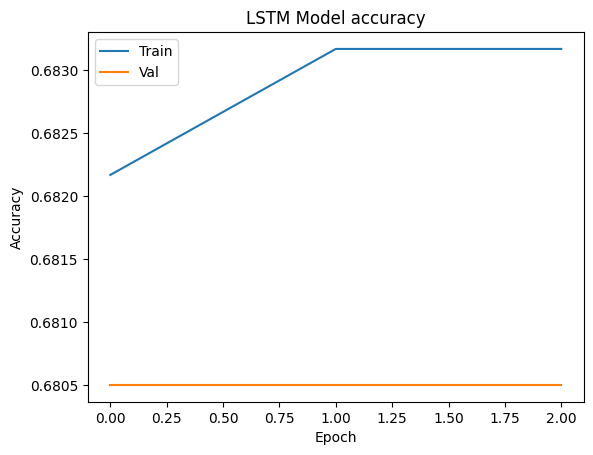

In [36]:
#plot the trainging process for the LSTM model and show accuracy and loss
import matplotlib.pyplot as plt
plt.plot(history_lstm.history['accuracy'])
plt.plot(history_lstm.history['val_accuracy'])
plt.title('LSTM Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

* 繪製每個epoch的training loss和validation loss的變化圖

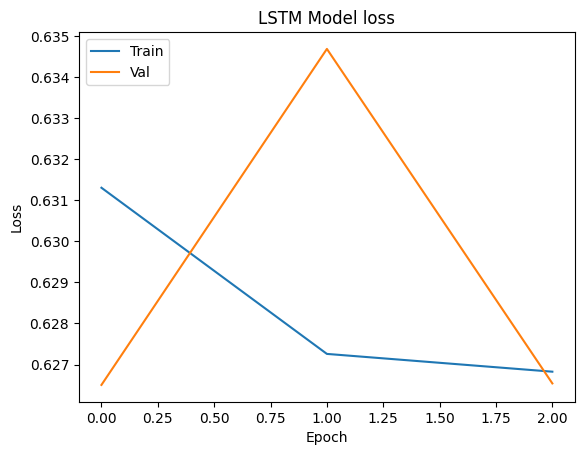

In [37]:
#plot the trainging process for the LSTM model and show accuracy and loss
plt.plot(history_lstm.history['loss'])
plt.plot(history_lstm.history['val_loss'])
plt.title('LSTM Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

* 用測試集的資料評估訓練出的LSTM模型在情緒分析任務上的表現

In [33]:
#show accuracy on test data
scores_lstm = model_lstm.evaluate(X_test, y_test)
print("Accuracy: ", scores_lstm[1])

63/63 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.6915 - loss: 0.6185
Accuracy:  0.7014999985694885


* 建立結構簡單但unit更大的LSTM模型用來訓練情緒分析的能力

In [39]:
#build the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.layers import SpatialDropout1D

model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=tfidf_matrix.shape[1], output_dim=128, input_length=tfidf_matrix.shape[1]))
model_lstm.add(SpatialDropout1D(0.7))
model_lstm.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

c:\Users\a0905\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


* 印出所建構出的LSTM模型的架構

In [41]:
#show LSTM model structure
print(model_lstm.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 29183, 128)     │     3,735,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_1             │ (None, 29183, 128)     │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,601,413 (44.26 MB)

 Trainable params: 3,867,137 (14.75 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,734,276 (29.50 MB)

None


* 用建立完的LSTM模型以切割出的訓練集和測試集進行訓練

In [40]:
#train the LSTM model
history_lstm = model_lstm.fit(X_train, y_train, epochs=3, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/3
188/188 ━━━━━━━━━━━━━━━━━━━━ 9814s 52s/step - accuracy: 0.6604 - loss: 0.6382 - val_accuracy: 0.6805 - val_loss: 0.6270
Epoch 2/3
188/188 ━━━━━━━━━━━━━━━━━━━━ 9748s 52s/step - accuracy: 0.6877 - loss: 0.6235 - val_accuracy: 0.6805 - val_loss: 0.6270
Epoch 3/3
188/188 ━━━━━━━━━━━━━━━━━━━━ 9758s 52s/step - accuracy: 0.6792 - loss: 0.6311 - val_accuracy: 0.6805 - val_loss: 0.6265


* 繪製每個epoch的training accuracy和validation accuracy的變化圖

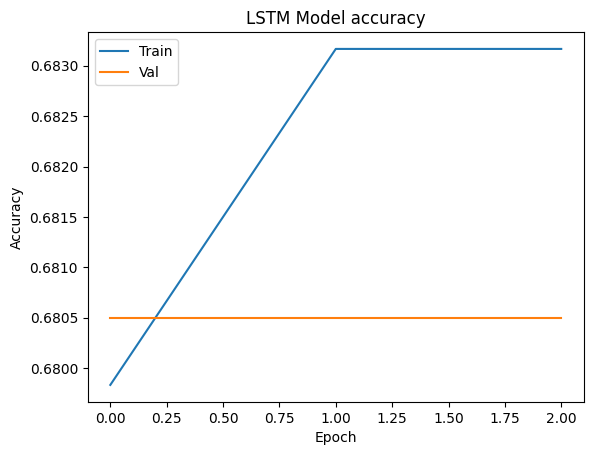

In [42]:
#plot the trainging process for the LSTM model and show accuracy and loss
import matplotlib.pyplot as plt
plt.plot(history_lstm.history['accuracy'])
plt.plot(history_lstm.history['val_accuracy'])
plt.title('LSTM Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

* 繪製每個epoch的training loss和validation loss的變化圖

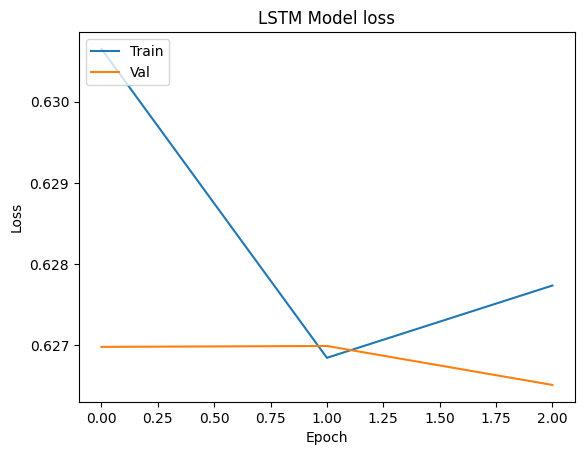

In [43]:
#plot the trainging process for the LSTM model and show accuracy and loss
plt.plot(history_lstm.history['loss'])
plt.plot(history_lstm.history['val_loss'])
plt.title('LSTM Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

* 用測試集的資料評估訓練出的LSTM模型在情緒分析任務上的表現

In [44]:
#show accuracy on test data
scores_lstm = model_lstm.evaluate(X_test, y_test)
print("Accuracy: ", scores_lstm[1])

63/63 ━━━━━━━━━━━━━━━━━━━━ 118s 2s/step - accuracy: 0.6915 - loss: 0.6183
Accuracy:  0.7014999985694885
